In [1]:
# 1. Import Libraries
# =========================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# 2. Load Dataset
# =========================
df = pd.read_csv("salary.csv")  # your dataset filename
print("Dataset Shape:", df.shape)
display(df.head())

Dataset Shape: (1000, 7)


,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.05366
1,PhD,11,Suburban,Director,59,Male,142591.25590
2,Bachelor,28,Suburban,Manager,61,Female,97800.25540
3,High School,29,Rural,Director,45,Male,96834.67128
4,PhD,25,Urban,Analyst,26,Female,132157.78620


In [3]:
# 3. Encode Categorical Columns
# =========================
label_encoders = {}
for col in ['Education', 'Location', 'Job_Title', 'Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

display(df.head())


,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,1,8,2,3,63,1,84620.05366
1,3,11,1,1,59,1,142591.25590
2,0,28,1,3,61,0,97800.25540
3,1,29,0,1,45,1,96834.67128
4,3,25,2,0,26,0,132157.78620


In [4]:
# 4. Features & Target
# =========================
X = df.drop('Salary', axis=1)
y = df['Salary']


In [5]:
# 5. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 6. Train Models
# =========================
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
voting = VotingRegressor([('rf', rf), ('gb', gb)])

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
voting.fit(X_train, y_train)

,estimators,"[('rf', ...), ('gb', ...)]"
,weights,None
,n_jobs,None
,verbose,False
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0


In [7]:
# 7. Evaluate Models
# =========================
def evaluate(model, name):
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("R² Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)


evaluate(rf, "Random Forest")
evaluate(gb, "Gradient Boosting")
evaluate(voting, "Voting Regressor")


Random Forest Performance:
R² Score: 0.844356143846842
MAE: 9270.311426202963
RMSE: 11273.302166548028

Gradient Boosting Performance:
R² Score: 0.8669621076201689
MAE: 8432.040342235074
RMSE: 10422.522343767258

Voting Regressor Performance:
R² Score: 0.8627537516645564
MAE: 8627.795837524349
RMSE: 10586.085508760056


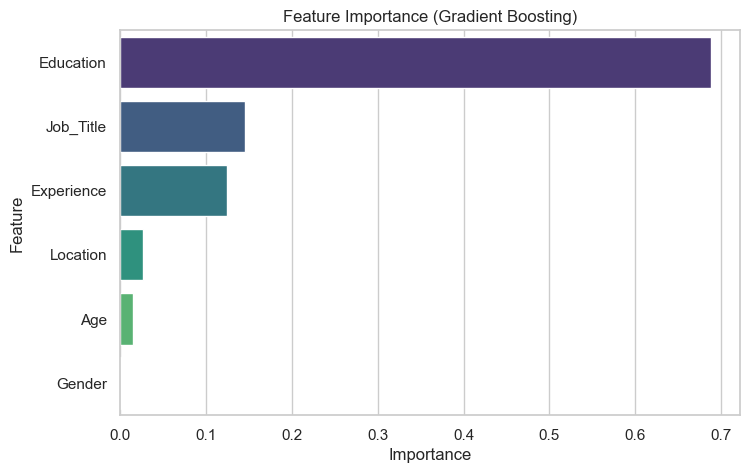

In [8]:
# 8. Feature Importance (Best Model: GB)
# =========================
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": gb.feature_importances_})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_df, hue="Feature", palette="viridis", legend=False)

plt.title("Feature Importance (Gradient Boosting)")
plt.show()

In [11]:
import joblib

# 9. Save Best Model
# =========================
joblib.dump(gb, "best_salary_model.pkl")
print("Best model saved as best_salary_model.pkl")
# Save the label encoders for later use in Streamlit
joblib.dump(label_encoders, "label_encoders.pkl")
print("Label encoders saved as label_encoders.pkl")


Best model saved as best_salary_model.pkl
Label encoders saved as label_encoders.pkl


In [12]:
# 10. Test Sample Prediction
# =========================
sample_df = pd.DataFrame([[2, 5, 1, 3, 28, 1]], columns=X.columns)
pred_salary = gb.predict(sample_df)[0]
print(f"\nPredicted Salary: ₹{pred_salary:,.2f}")


Predicted Salary: ₹111,035.64
